In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "matplotlib-challenge/data/Mouse_metadata.csv"
study_results_path = "matplotlib-challenge/data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [13]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [14]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [15]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [24]:
# Combine the data into a single dataset

resultsDF = study_results.merge(mouse_metadata,how='left', on='Mouse ID')

In [25]:
resultsDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# Display the data table for preview
resultsDF.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [28]:
# Checking the number of mice.
clean_results = resultsDF.drop_duplicates()

In [29]:
clean_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF = resultsDF[resultsDF.duplicated()]

In [35]:
duplicateRowsDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [ ]:
# Checking the number of mice in the clean DataFrame.

In [51]:
len(clean_results)

1892

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [ ]:
#Capomulin
#Ketapril
#Placebo
#Stelasyn
#Infubinol
#Naftisol

In [53]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

clean_results['Tumor Volume (mm3)'].describe()

count    1892.000000
mean       50.451260
std         8.896191
min        22.050126
25%        45.000000
50%        48.954697
75%        56.298917
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [55]:
clean_mean = clean_results.groupby("Drug Regimen").mean()
clean_mean
#Here is a clean dataframe with all of the mean for each drug regimen. I love a clean dataframe.

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,21.565217,40.675741,0.713043,13.456522,19.965217
Ceftamin,19.747191,52.591172,1.179775,13.247191,27.398876
Infubinol,18.174157,52.884795,0.960674,16.230337,27.196629
Ketapril,19.707447,55.235638,1.297872,15.659574,27.861702
Naftisol,19.623656,54.331565,1.182796,12.000000,27.166667
Placebo,18.674033,54.033581,1.441989,10.734807,27.928177
Propriva,16.968750,52.368318,0.981250,10.831250,27.050000
Ramicane,21.425439,40.216745,0.548246,10.684211,19.679825
Stelasyn,19.226519,54.233149,0.872928,12.784530,27.856354


In [77]:
drug_regimen = clean_results.groupby('Drug Regimen')
drug_regimen.first()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Ceftamin,x822,0,45.0,0,Male,3,29
Infubinol,c326,0,45.0,0,Female,18,25
Ketapril,f932,0,45.0,0,Male,15,29
Naftisol,f993,0,45.0,0,Male,21,28
Placebo,a897,0,45.0,0,Male,7,28
Propriva,g989,0,45.0,0,Female,21,26
Ramicane,c458,0,45.0,0,Female,23,20
Stelasyn,f234,0,45.0,0,Male,14,28


In [76]:
Capomulin = drug_regimen.get_group('Capomulin')
Capomulin
#Results for Capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Female,9,22
226,j246,0,45.000000,0,Female,21,21
227,r554,0,45.000000,0,Female,8,17
228,s185,0,45.000000,0,Female,3,17
229,b742,0,45.000000,0,Male,7,21
...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Female,1,23
1859,j119,45,38.125164,1,Female,7,23
1878,i557,45,47.685963,1,Female,1,24
1888,r944,45,41.581521,2,Male,12,25


In [78]:
Capomulin.describe()
#I isolated a single drug regimen and put the stats for that treatment into a dataframe.
#Perhaps it would be easier to do it another way, by groupby and stat type.
#The value from this method, though, is the same as when I did a mean on its own.
#So that's gratifying.

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,21.565217,40.675741,0.713043,13.456522,19.965217
std,14.384994,4.994774,0.848993,7.721423,2.732404
min,0.000000,23.343598,0.000000,1.000000,15.000000
25%,10.000000,37.685933,0.000000,7.000000,17.000000
50%,20.000000,41.557809,0.000000,16.500000,20.500000
75%,35.000000,45.000000,1.000000,20.000000,22.000000
max,45.000000,48.158209,3.000000,24.000000,25.000000


In [59]:
regimen_mean = clean_results.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_results.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_results.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_results.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_results.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [60]:
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats_table

In [61]:
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
single_group_by = clean_results.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen.

In [85]:
mouse_count = clean_results.groupby("Drug Regimen").count()['Mouse ID']
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [89]:
mouse_count = mouse_count.to_frame()

In [90]:
mouse_count

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,160
Ramicane,228
Stelasyn,181


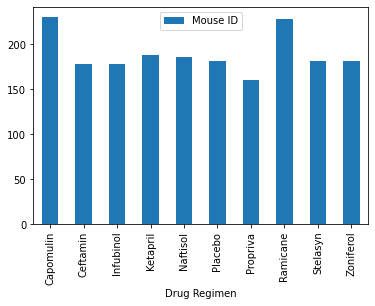

In [103]:
mouse_count.plot.bar(y='Mouse ID')

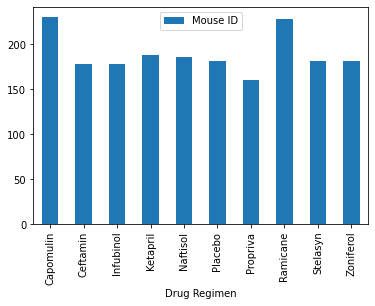

In [107]:
mouse_count.plot(kind="bar");

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [125]:
gender_mice = clean_results[['Mouse ID', 'Sex']]

In [198]:
gender_count = gender_mice.groupby('Mouse ID')
gender_count = gender_count.first()

In [199]:
gender_count

,Sex
Mouse ID,
a203,Female
a251,Female
a262,Female
a275,Female
a366,Female
...,...
z435,Female
z578,Male
z581,Female


In [204]:
gender_countDF = gender_count['Sex'].value_counts(sort=True)

In [207]:
gender_countDF = pd.DataFrame(gender_countDF)

In [208]:
gender_countDF

,Sex
Male,125
Female,124


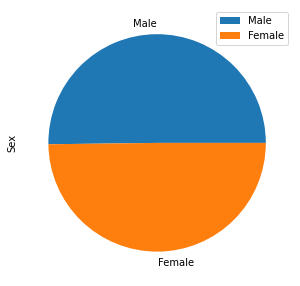

In [212]:
plot = gender_countDF.plot.pie(y='Sex', figsize=(5, 5))

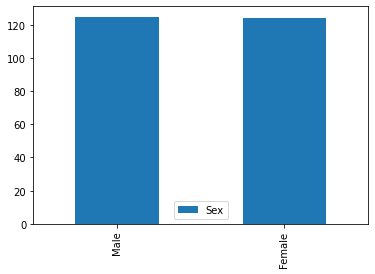

In [213]:
gender_countDF.plot.bar(y='Sex')
#I felt like a bar chart might be a better representation.

<ipython-input-217-a3edc2af7c22>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(gender_countDF, labels=labels, autopct='%1.1f%%',


([<matplotlib.patches.Wedge at 0x1222b2820>,
 [Text(-1.0999781124353174, -0.006939175976765592, 'Male'),
  Text(1.0999781124353174, 0.006939175976765457, 'Female')],
 [Text(-0.5999880613283548, -0.003785005078235777, '50.2%'),
  Text(0.5999880613283548, 0.0037850050782357036, '49.8%')])

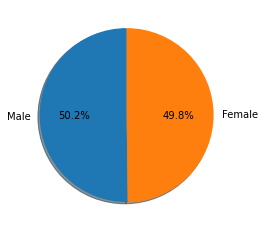

In [217]:
labels = 'Male', 'Female'
fig1, ax1 = plt.subplots()
ax1.pie(gender_countDF, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)